# Data Viz in Python : Matplotlib

## Dataset for this exercise

In [31]:
# Re-importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from matplotlib import rcParams



# Seed for reproducibility
np.random.seed(42)

# Generate 200 rows of sample data
names = np.random.choice(['Hana', 'Fara', 'Siti',  'Fariz','Umar','Hariz','Mutu','Sandesh','Saravanan','Sharda','Kajol','Saranyah','Ah Hock','Chong Wei','Mei Chew','Wei Meng','Kok Beng','Kok Hang','Andrew','Garfield','David','Mary','Katy','Christina'], size=200)
ages = np.random.randint(20, 60, size=200)
gender = np.random.choice(['Male','Female'],size=200, p=[0.6,0.4])
salaries = np.random.randint(30000, 120000, size=200)
departments = np.random.choice(['HR', 'IT', 'Finance', 'Marketing', 'Operations'], size=200)
hire_dates = pd.date_range(start='2015-01-01', end='2023-12-31', periods=200)
employee_ids = np.arange(1001, 1201)

# Create the DataFrame
df = pd.DataFrame({
    'Employee ID': employee_ids,
    'Name': names,
    'Age': ages,
    'Gender' : gender,
    'Salary': salaries,
    'Department': departments,
    'Hire Date': hire_dates
})

# Introduce null values randomly in the DataFrame for certain rows and columns
null_indices = np.random.choice(df.index, size=15, replace=False)

# Choose random columns where nulls will be introduced (excluding Employee ID column)
columns_to_nullify = np.random.choice(df.columns[1:], size=3, replace=False)

# Scatter nulls across rows and columns
for index in null_indices:
    # Randomly choose one column from columns_to_nullify for each row
    column_to_nullify = np.random.choice(columns_to_nullify)
    df.loc[index, column_to_nullify] = np.nan

# Show the DataFrame with null values
df.head(20)  # Displaying the first 20 rows for inspection


,Employee ID,Name,Age,Gender,Salary,Department,Hire Date
0,1001,Mutu,56.0,Female,105672.0,HR,2015-01-01 00:00:00.000000000
1,1002,Garfield,36.0,Male,95545.0,Marketing,2015-01-17 12:18:05.427135678
2,1003,Mei Chew,21.0,Male,NaN,Finance,2015-02-03 00:36:10.854271357
3,1004,Kajol,21.0,Male,88141.0,IT,2015-02-19 12:54:16.281407035
4,1005,Sandesh,47.0,Male,53793.0,HR,2015-03-08 01:12:21.708542714
5,1006,David,42.0,Female,86570.0,Operations,2015-03-24 13:30:27.135678392
6,1007,Mutu,56.0,Male,67892.0,Marketing,2015-04-10 01:48:32.562814071
7,1008,Andrew,51.0,Female,31015.0,IT,2015-04-26 14:06:37.989949750
8,1009,Katy,52.0,Male,91813.0,IT,2015-05-13 02:24:43.417085428
9,1010,Kajol,20.0,Male,57712.0,Finance,2015-05-29 14:42:48.844221106


## Scatter Plot

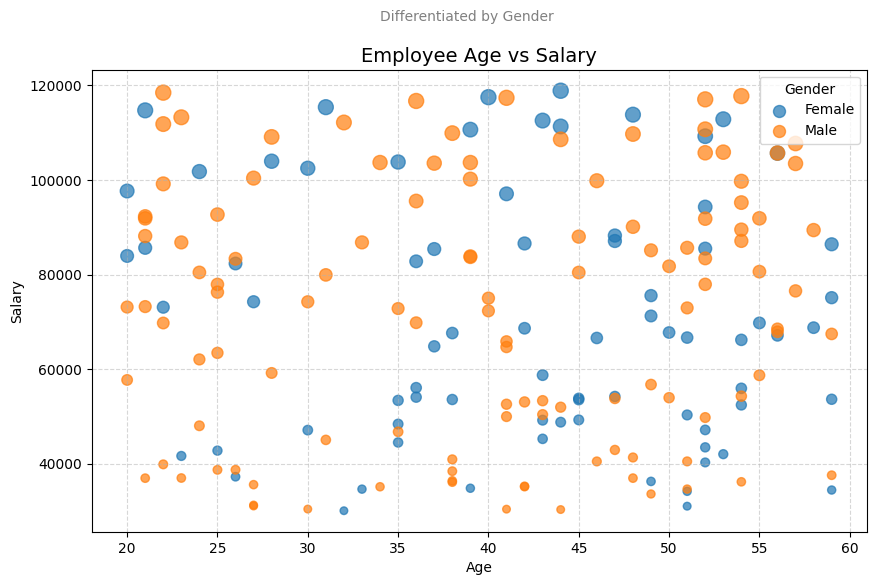

In [2]:

plt.figure(figsize=(10, 6))
for gender, group in df.groupby('Gender'):
    plt.scatter(group['Age'], group['Salary'], label=gender, s=group['Salary']/1000, alpha=0.7)

plt.title("Employee Age vs Salary", fontsize=14)
plt.suptitle("Differentiated by Gender", fontsize=10, color="gray")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Gender")
plt.show()


## Bar Graph

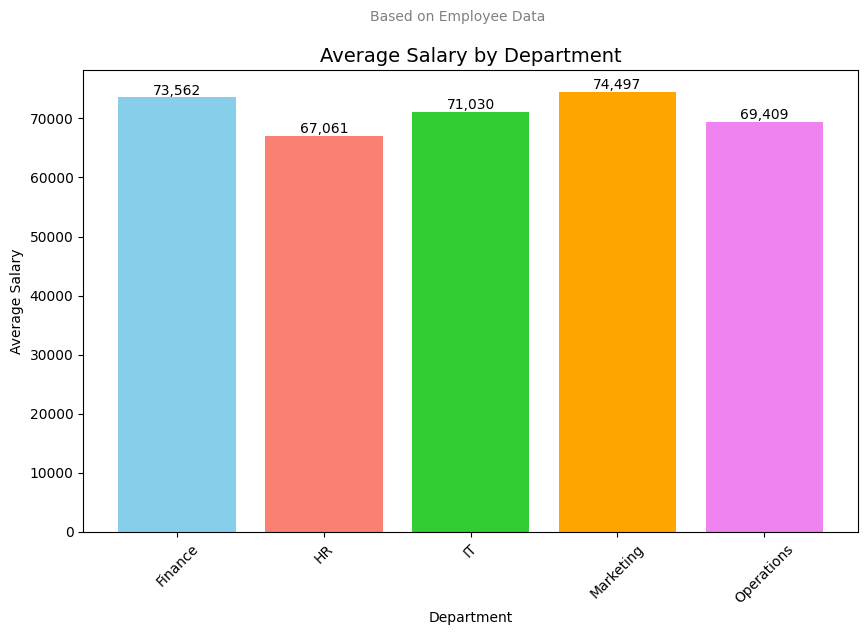

In [3]:
avg_salary_by_dept = df.groupby('Department')['Salary'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_salary_by_dept.index, avg_salary_by_dept.values, color=['skyblue', 'salmon', 'limegreen', 'orange', 'violet'])

plt.title("Average Salary by Department", fontsize=14)
plt.suptitle("Based on Employee Data", fontsize=10, color="gray")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom')

plt.show()

## Clustered Bar Graph

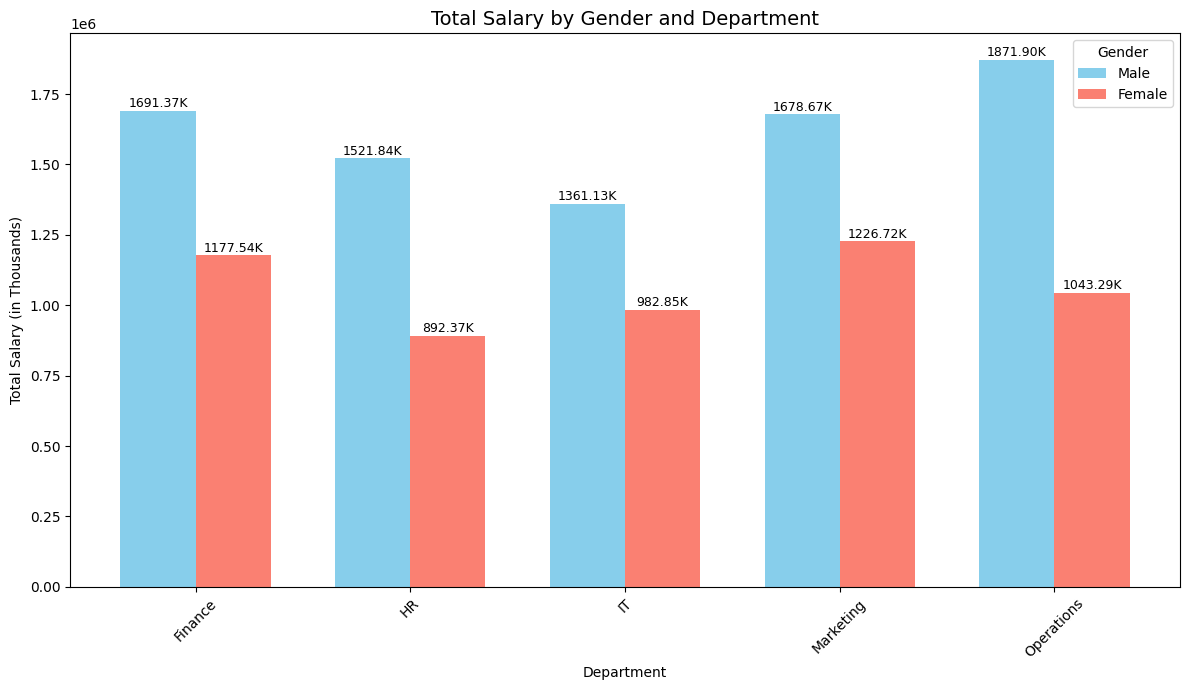

In [10]:
# Prepare data for clustered bar chart
stacked_data = df.groupby(['Department', 'Gender'])['Salary'].sum().unstack().fillna(0)
stacked_data = stacked_data[['Male', 'Female']]  # Ensure consistent order of gender

# Plotting
import matplotlib.pyplot as plt

# Clustered bar chart requires shifting the x positions slightly for each category
bar_width = 0.35  # Width of the bars
departments = stacked_data.index
x = range(len(departments))  # Positions for the departments

fig, ax = plt.subplots(figsize=(12, 7))

# Plot bars for each gender (clustered)
bars_male = ax.bar([i - bar_width/2 for i in x], stacked_data['Male'], bar_width, label='Male', color='skyblue')
bars_female = ax.bar([i + bar_width/2 for i in x], stacked_data['Female'], bar_width, label='Female', color='salmon')

# Add data labels for each bar segment
for bar in bars_male:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2000, f"{height / 1e3:.2f}K", ha='center', va='bottom', fontsize=9, color='black')

for bar in bars_female:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2000, f"{height / 1e3:.2f}K", ha='center', va='bottom', fontsize=9, color='black')

# Add labels and title
ax.set_title("Total Salary by Gender and Department", fontsize=14)
ax.set_xlabel("Department")
ax.set_ylabel("Total Salary (in Thousands)")
ax.set_xticks(x)
ax.set_xticklabels(departments, rotation=45)
ax.legend(title="Gender")

# Show plot
plt.tight_layout()
plt.show()


## Stacked Bar Graph

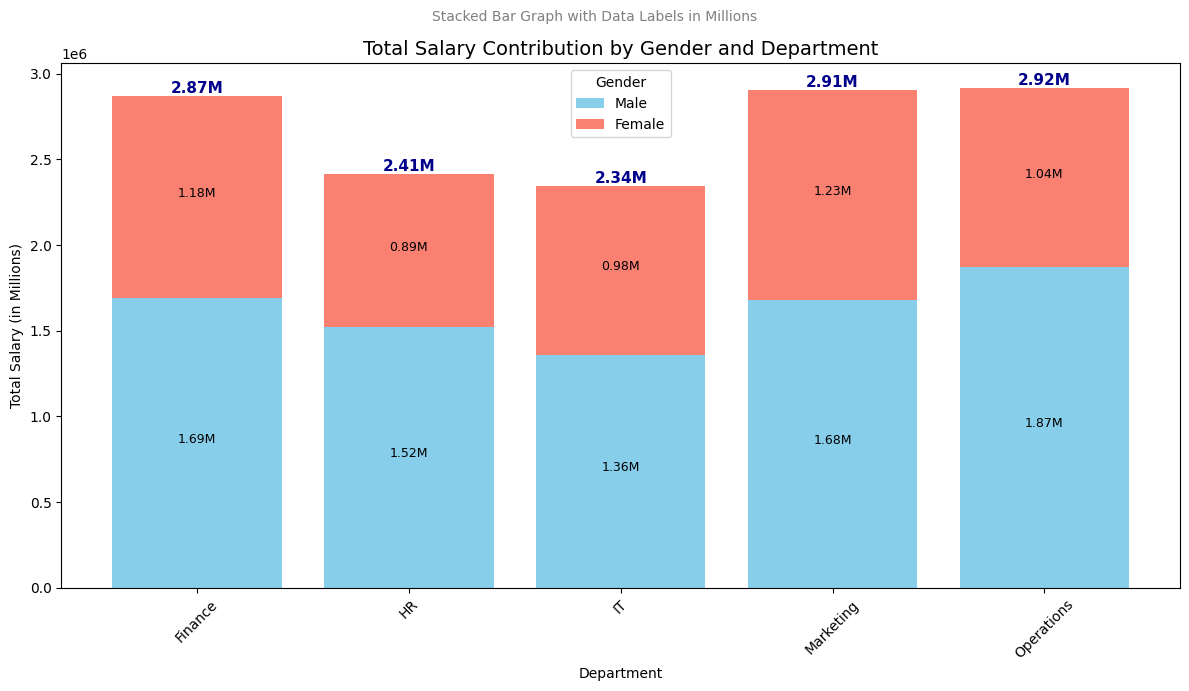

In [5]:
# Prepare data for stacked bar graph
stacked_data = df.groupby(['Department', 'Gender'])['Salary'].sum().unstack().fillna(0)
stacked_data = stacked_data[['Male', 'Female']]  # Ensure consistent order of gender

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
bar1 = plt.bar(stacked_data.index, stacked_data['Male'], label='Male', color='skyblue')
bar2 = plt.bar(stacked_data.index, stacked_data['Female'], bottom=stacked_data['Male'], label='Female', color='salmon')

# Add data labels for each segment with "M" format
for i in range(len(stacked_data)):
    plt.text(i, stacked_data['Male'].iloc[i] / 2, f"{stacked_data['Male'].iloc[i] / 1e6:.2f}M", 
             ha='center', color='black', fontsize=9)
    plt.text(i, stacked_data['Male'].iloc[i] + stacked_data['Female'].iloc[i] / 2, 
             f"{stacked_data['Female'].iloc[i] / 1e6:.2f}M", ha='center', color='black', fontsize=9)

# Add total value on top of each bar with "M" format
for i in range(len(stacked_data)):
    total = stacked_data['Male'].iloc[i] + stacked_data['Female'].iloc[i]
    plt.text(i, total, f"{total / 1e6:.2f}M", ha='center', va='bottom', color='darkblue', fontsize=11, fontweight='bold')

# Add labels and title
plt.title("Total Salary Contribution by Gender and Department", fontsize=14)
plt.suptitle("Stacked Bar Graph with Data Labels in Millions", fontsize=10, color='gray')
plt.xlabel("Department")
plt.ylabel("Total Salary (in Millions)")
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Show plot
plt.tight_layout()
plt.show()


## 100% Stacked Bar Graph

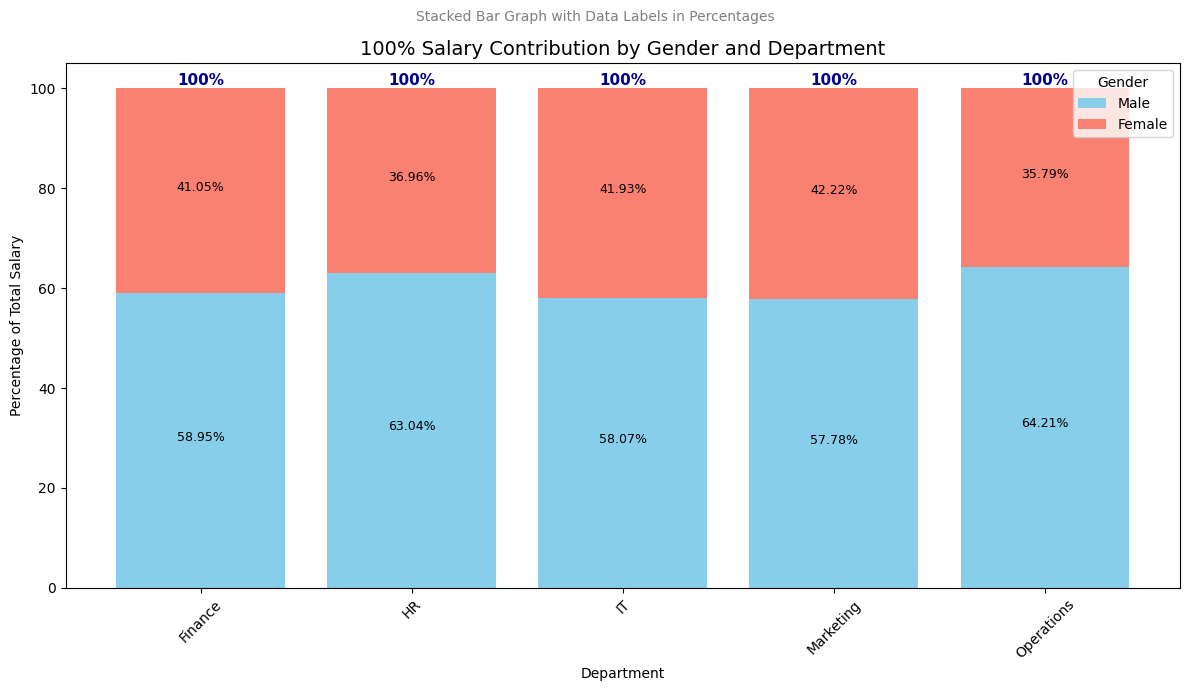

In [6]:
# Prepare data for 100% stacked bar graph
stacked_data = df.groupby(['Department', 'Gender'])['Salary'].sum().unstack().fillna(0)
stacked_data = stacked_data[['Male', 'Female']]  # Ensure consistent order of gender

# Convert to percentage
stacked_data_percent = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
bar1 = plt.bar(stacked_data_percent.index, stacked_data_percent['Male'], label='Male', color='skyblue')
bar2 = plt.bar(stacked_data_percent.index, stacked_data_percent['Female'], bottom=stacked_data_percent['Male'], label='Female', color='salmon')

# Add data labels for each segment with percentage format
for i in range(len(stacked_data_percent)):
    plt.text(i, stacked_data_percent['Male'].iloc[i] / 2, f"{stacked_data_percent['Male'].iloc[i]:.2f}%", 
             ha='center', color='black', fontsize=9)
    plt.text(i, stacked_data_percent['Male'].iloc[i] + stacked_data_percent['Female'].iloc[i] / 2, 
             f"{stacked_data_percent['Female'].iloc[i]:.2f}%", ha='center', color='black', fontsize=9)

# Add total value on top of each bar (always 100% in this case)
for i in range(len(stacked_data_percent)):
    plt.text(i, 100, f"100%", ha='center', va='bottom', color='darkblue', fontsize=11, fontweight='bold')

# Add labels and title
plt.title("100% Salary Contribution by Gender and Department", fontsize=14)
plt.suptitle("Stacked Bar Graph with Data Labels in Percentages", fontsize=10, color='gray')
plt.xlabel("Department")
plt.ylabel("Percentage of Total Salary")
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Show plot
plt.tight_layout()
plt.show()


## Line Graph

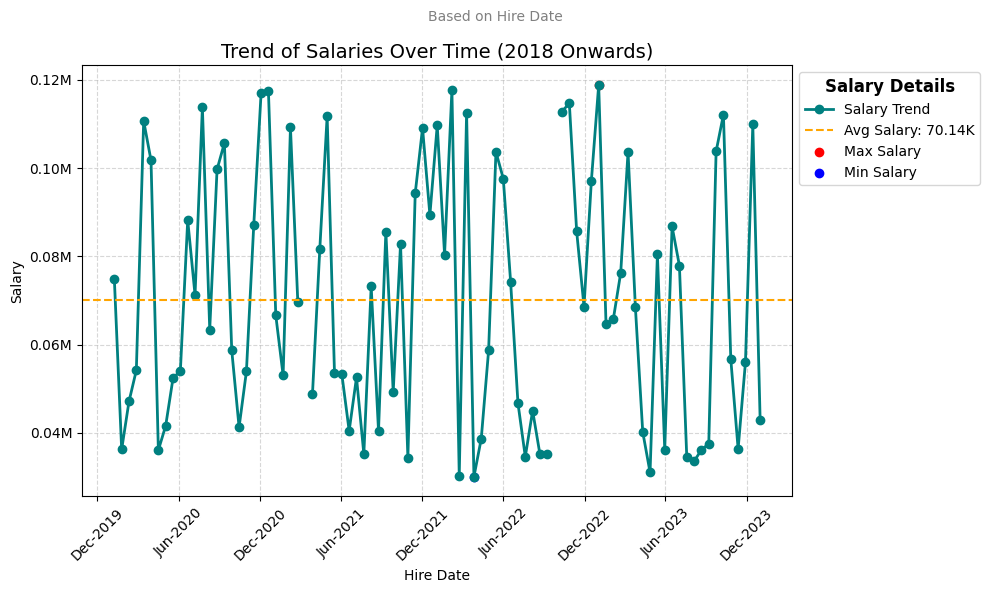

In [34]:
# Filter the data to include only hires from 2018 onwards
df_filtered = df[df['Hire Date'].dt.year >= 2020]

# Sort the filtered data by 'Hire Date'
df_sorted = df_filtered.sort_values('Hire Date')

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Hire Date'], df_sorted['Salary'], marker='o', color='teal', linewidth=2, label='Salary Trend')

# Plot the average salary as a dotted line
avg_salary = df_sorted['Salary'].mean()
plt.axhline(y=avg_salary, color='orange', linestyle='--', label=f'Avg Salary: {avg_salary / 1e3:.2f}K')


# Find and highlight max and min salary points
max_salary = df_sorted['Salary'].max()
min_salary = df_sorted['Salary'].min()
plt.scatter(df_sorted['Hire Date'][df_sorted['Salary'].idxmax()], max_salary, color='red', label='Max Salary')
plt.scatter(df_sorted['Hire Date'][df_sorted['Salary'].idxmin()], min_salary, color='blue', label='Min Salary')

# Add titles, labels, and grid
plt.title("Trend of Salaries Over Time (2018 Onwards)", fontsize=14)
plt.suptitle("Based on Hire Date", fontsize=10, color="gray")
plt.xlabel("Hire Date")
plt.ylabel("Salary")
plt.grid(True, linestyle='--', alpha=0.5)

# Formatting y-axis tick labels to display in 'M' (millions)
def currency_format(x, pos):
    return f'{x / 1e6:.2f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))

# Set x-axis to have ticks every 6 months and format the labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set tick interval to 6 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Format the ticks as 'Jan-2020', 'Jun-2020', etc.

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the legend to not disturb the line graph
from matplotlib.font_manager import FontProperties
bold_underline_font = FontProperties(weight='bold', style='normal', size=12)

# Adding bold and underline title
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    fontsize=10,
    title="Salary Details",
    title_fontproperties=bold_underline_font
)



# Show the plot
plt.tight_layout()
plt.show()


## Pie Chart

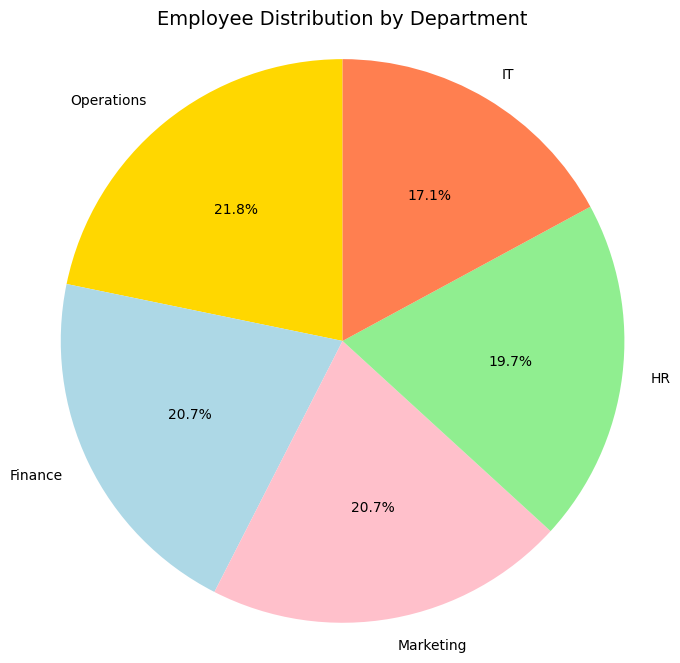

In [5]:
dept_counts = df['Department'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', colors=['gold', 'lightblue', 'pink', 'lightgreen', 'coral'], startangle=90)
plt.title("Employee Distribution by Department", fontsize=14)
plt.axis('equal')  # Ensures the pie is a circle
plt.show()


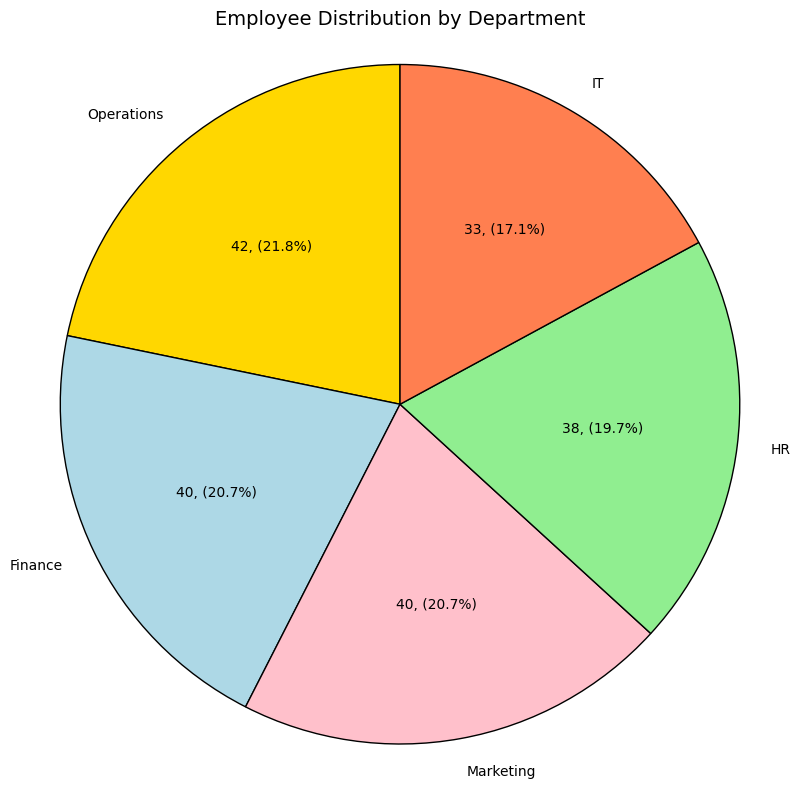

In [48]:
import matplotlib.pyplot as plt

# Count of employees per department
dept_counts = df['Department'].value_counts()

# Define colors for the pie chart
colors = ['gold', 'lightblue', 'pink', 'lightgreen', 'coral']

# Function to display both count and percentage in bold labels
def autopct_with_count(pct, all_values):
    total = sum(all_values)
    count = int(round(pct * total / 100))
    return f'{count}, ({pct:.1f}%)'  # Bold formatting

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    dept_counts,
    labels=dept_counts.index,  # Add department names
    autopct=lambda pct: autopct_with_count(pct, dept_counts.values),  # Custom label function
    colors=colors,
    startangle=90,
    labeldistance=1.1,         # Move labels outside the pie chart
    wedgeprops={'edgecolor': 'black'}  # Add edge color for clarity
    #textprops={'fontsize': 10, 'weight': 'bold'}  # Bold labels
)

# Add a title
plt.title("Employee Distribution by Department", fontsize=14)
plt.axis('equal')  # Ensures the pie is a circle

# Show the plot
plt.tight_layout()
plt.show()


## Donut Chart

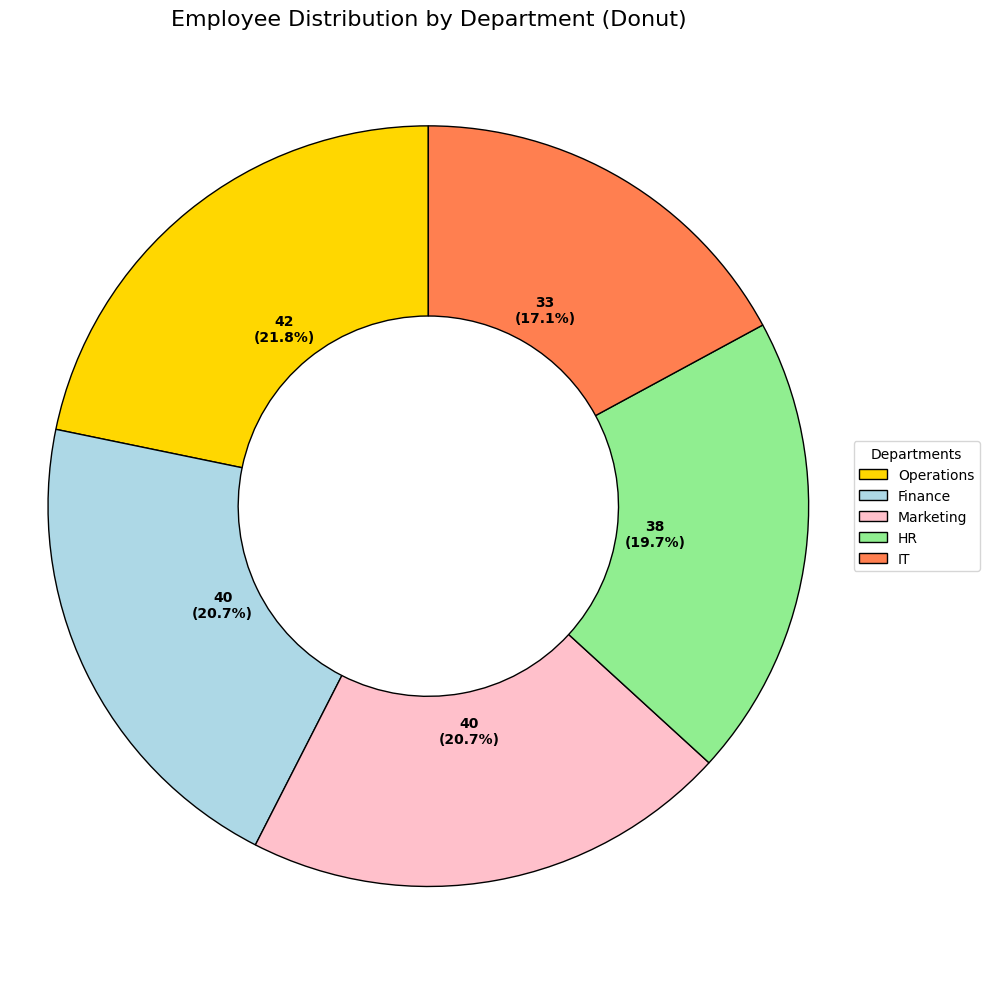

In [61]:
import matplotlib.pyplot as plt

# Count of employees per department
dept_counts = df['Department'].value_counts()

# Define colors for the donut chart
colors = ['gold', 'lightblue', 'pink', 'lightgreen', 'coral']

# Function to display count and percentage in the labels
def autopct_with_count(pct, all_values):
    total = sum(all_values)
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'  # Count and percentage on two lines

# Plot the donut chart
plt.figure(figsize=(10, 10))  # Larger figure size
plt.pie(
    dept_counts,
    labels=None,  # Suppress default labels
    autopct=lambda pct: autopct_with_count(pct, dept_counts.values),  # Custom labels inside
    colors=colors,
    startangle=90,
    labeldistance=1, 
    wedgeprops=dict(width=0.5, edgecolor='black'),  # Wider donut, with border for clarity
    textprops={'fontsize': 10, 'weight': 'bold'}  # Bold and readable labels
)

# Add a central circle to create the donut hole
plt.gca().add_artist(plt.Circle((0, 0), 0.3, color='white'))

# Add a title
plt.title("Employee Distribution by Department (Donut)", fontsize=16)

# Add department names in a legend
plt.legend(dept_counts.index, title="Departments", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Ensure the chart remains a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


## Box Plot

C:\Users\6571kb\AppData\Local\Temp\ipykernel_5708\654113941.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[df['Department'] == dept]['Salary'].dropna() for dept in df['Department'].unique()],


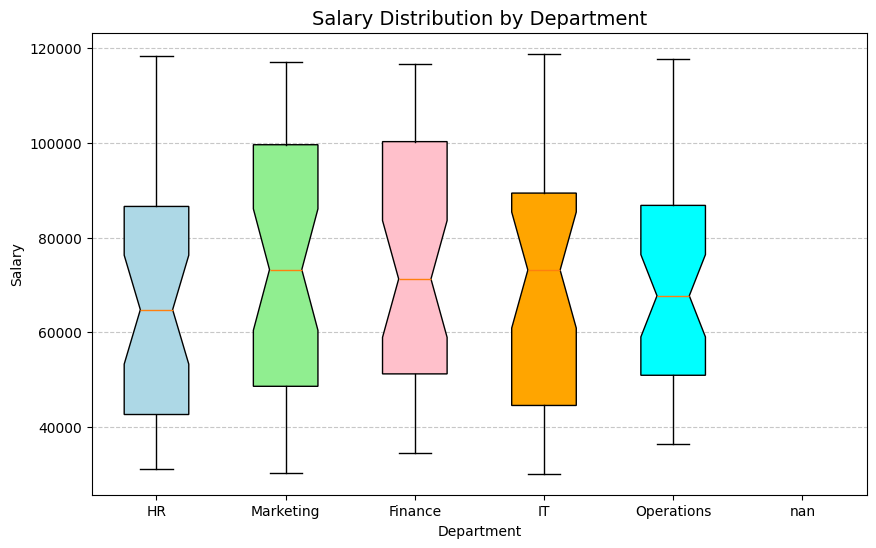

In [7]:
plt.figure(figsize=(10, 6))
box = plt.boxplot([df[df['Department'] == dept]['Salary'].dropna() for dept in df['Department'].unique()],
                  labels=df['Department'].unique(), patch_artist=True, notch=True)

colors = ['lightblue', 'lightgreen', 'pink', 'orange', 'cyan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Salary Distribution by Department", fontsize=14)
plt.ylabel("Salary")
plt.xlabel("Department")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Heatmap

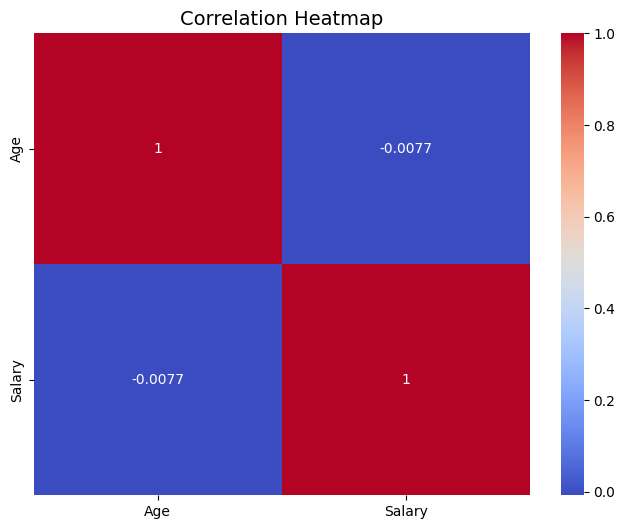

In [8]:
import seaborn as sns

plt.figure(figsize=(8, 6))
correlation = df[['Age', 'Salary']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()
